## Project On Flight Price Predictions and Deployment

In [2]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [3]:
# loading all the dependencies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_excel("/content/drive/MyDrive/Flask/Flight Price /Data/Data_Train.xlsx")

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Manual EDA

In [6]:
## identify the rows and columns 

data.shape

(10683, 11)

In [7]:
## identity the data types 

data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
## missing values 

data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
## Remove the NAN values from the dataset 

data.dropna(how='any', inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
## statstical measures

data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## **Feature Engineering**

Let's convert **Date_of_Journey** to its appropriate format as **datetime** with regards to **day** and **month**

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Date_of_journey**

In [12]:
data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])
data['Day_of_Journey']=(data['Date_of_Journey']).dt.day
data['Month_of_Journey']=(data['Date_of_Journey']).dt.month

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [14]:
## now we can remove the date_of_journey columns 

data.drop(['Date_of_Journey'], axis=1, inplace=True)

Let's do the same for the other relative columns 

**Departure Time**

In [15]:
## convert to datetime 

data['Dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [16]:
## let's drop the dep_time column

data.drop(['Dep_Time'],axis=1, inplace=True)

**Arrical Time**

In [17]:
data['Arrival_hr']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [18]:
## let's  drop the arrival time column
data.drop(['Arrival_Time'], axis=1, inplace=True)

**Duration Time**

In [19]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [20]:
duration = data['Duration'].str.split(' ', expand=True) ## split duration datapoints based on spaces
duration[1].fillna('00m', inplace=True) ## fill all Nan Values
data['duration_hr']= duration[0].apply(lambda x: x[:-1]) ## Select the item at index 0 and leave the last one (in this case 'hour')
data['duration_min']=duration[1].apply(lambda x: x[:-1]) ## Select the itme at index 1 and  leave the last one (in this case 'minutes')

In [21]:
## we can drop the duration columns 

data.drop(['Duration'], axis=1, inplace=True)

In [22]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
data.tail()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,5,9,10,55,19,15,8,20


In [24]:
cf.set_config_file(theme='ggplot', sharing='public', offline=True)

**Count of Airlines**

In [25]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Airline Vs. Price**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



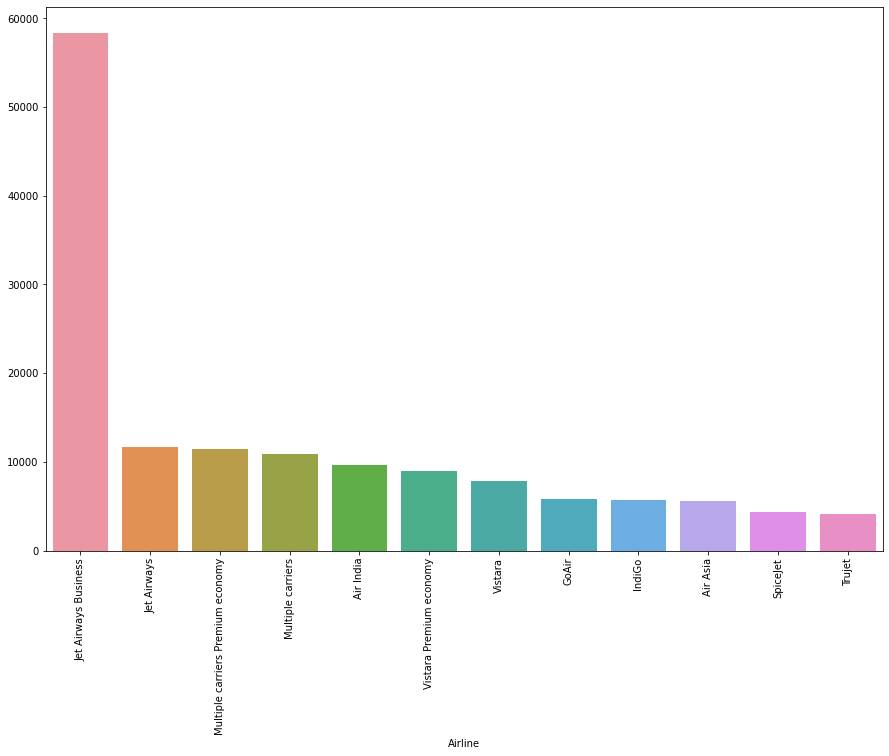

In [26]:
Airprices = data.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index, Airprices.values)
plt.xticks(rotation=90);

**Jet Airways Business has the highest price with Trujet having the lowest**

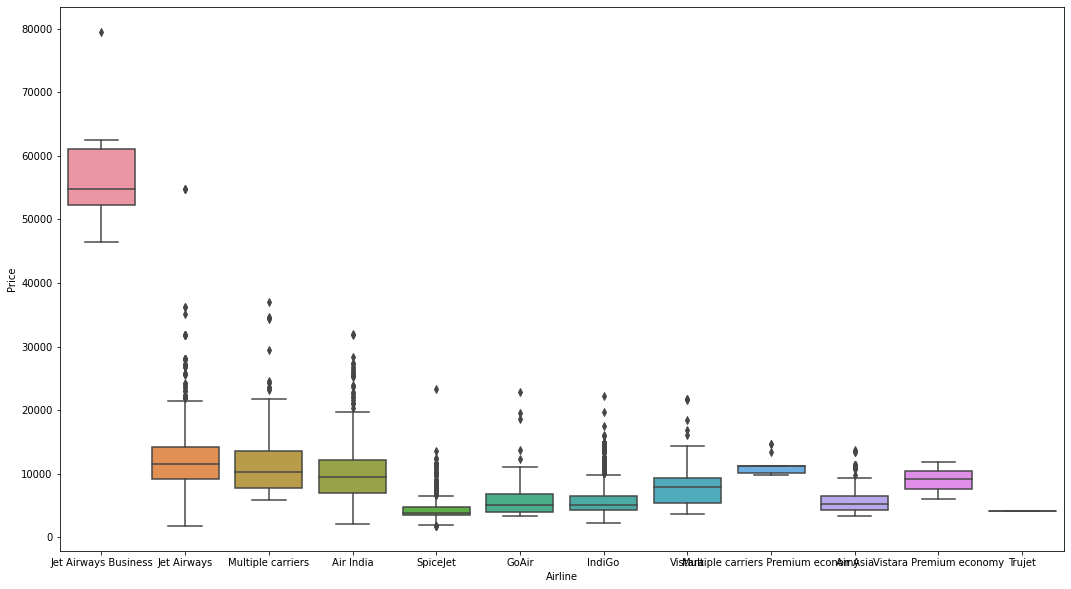

In [27]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price', x='Airline',data= data.sort_values('Price', ascending=False))
plt.show()

**Price based on number of stops**

In [28]:
data.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

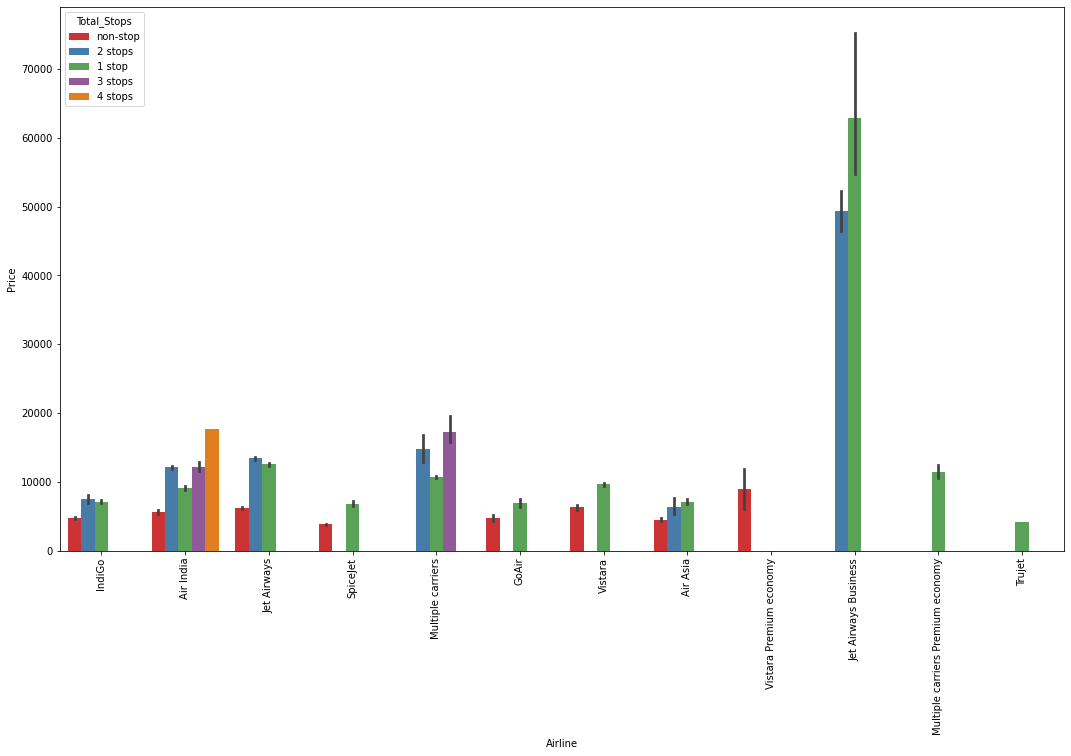

In [29]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=data['Airline'], y=data['Price'], hue=data['Total_Stops'],palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stops Jet Airways Business is having the highest price**

In [30]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

**Source Vs Price**

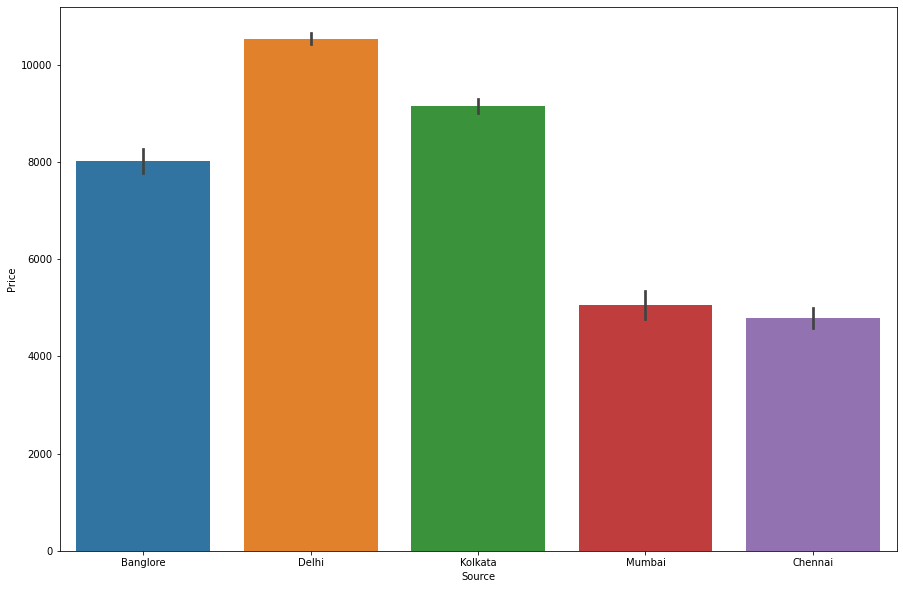

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price', x='Source', data=data.sort_values('Price', ascending=False))
plt.show()

**Destination Vs. Price**

In [32]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

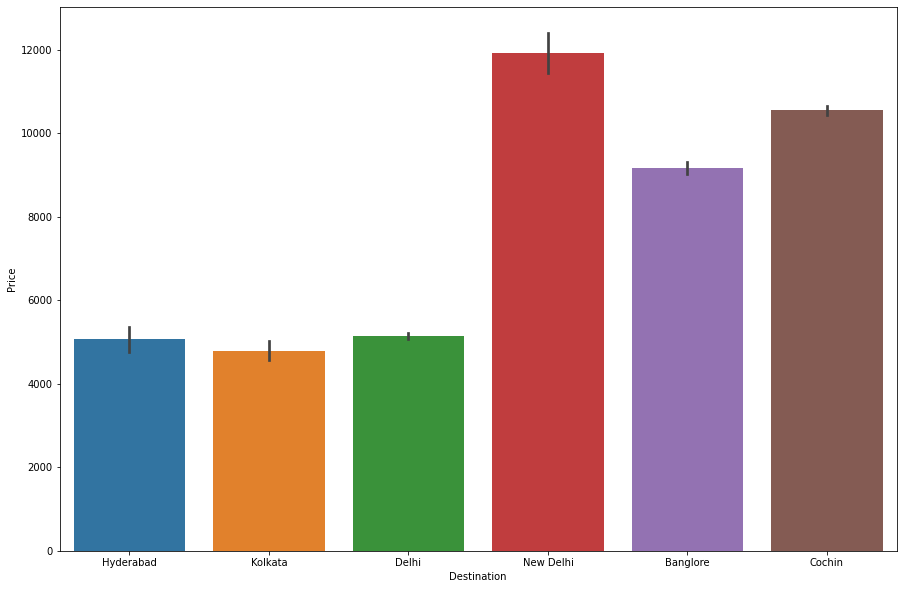

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price', x='Destination', data= data.sort_values('Price', ascending='False'))
plt.show()

In [34]:
for i in data:
  data.replace('New Delhi','Delhi', inplace=True)

In [35]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

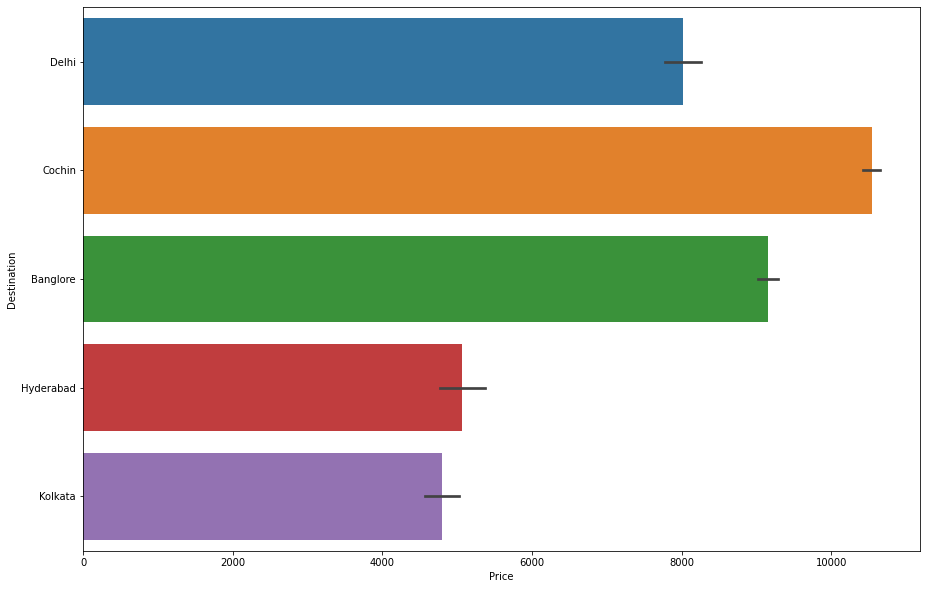

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x='Price', y='Destination', data=data.sort_values('Price', ascending=False))
plt.show()

In [37]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

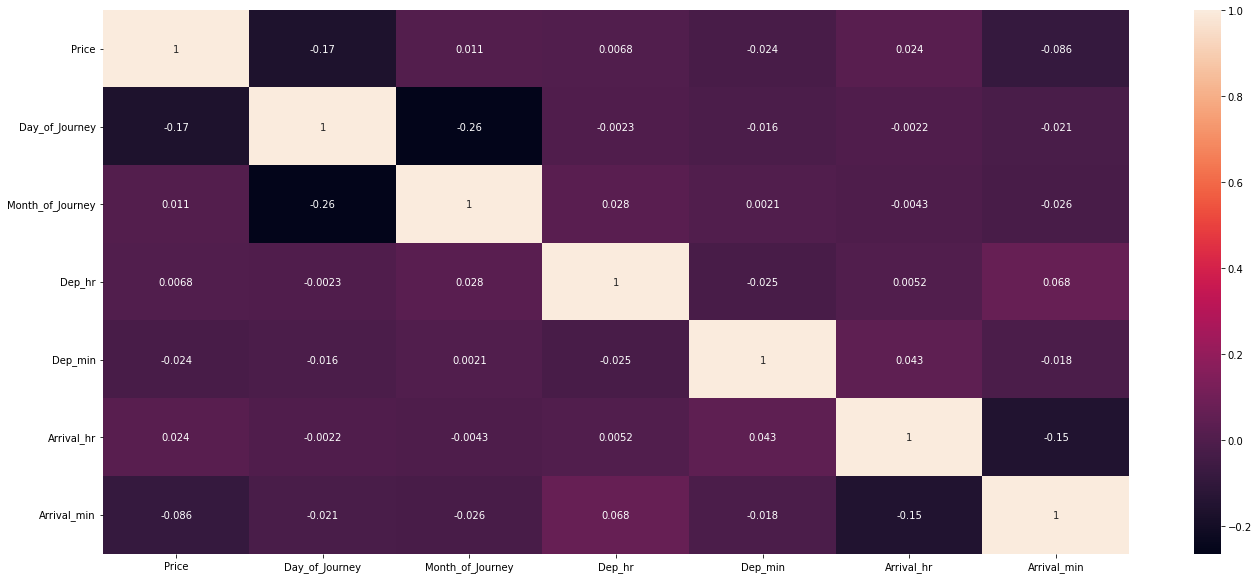

In [39]:
## Correlation 

plt.figure(figsize=(23,10))
sns.heatmap(data.corr(), annot=True)

The features are less correlated which is a good thing for us to avoid **Multicollinearity**

**Apply Onehot Encoding on the categorical variables**

In [40]:
## handling categorical values 

data['Total_Stops']=data['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1,'3 stops': 3, '4 stops':4})
air_dummy=pd.get_dummies(data['Airline'],drop_first=True)
source_dese_dummy = pd.get_dummies(data[['Source', 'Destination']],drop_first=True)

data = pd.concat([air_dummy, source_dese_dummy,data], axis=1)

In [41]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


In [42]:
data.shape

(10682, 34)

## Test Data

In [43]:
data_test = pd.read_excel("/content/drive/MyDrive/Flask/Flight Price /Data/Test_set.xlsx")

In [44]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**Let's Perfrom that same steps as we did fro train data eariler**

In [45]:
data_test['Date_of_Journey']=pd.to_datetime(data_test['Date_of_Journey'])
data_test['Day_of_Journey']=(data_test['Date_of_Journey']).dt.day
data_test['Month_of_Journey']=(data_test['Date_of_Journey']).dt.month

## Det_time
data_test['Dep_hr'] = pd.to_datetime(data_test['Dep_Time']).dt.hour
data_test['Dep_min'] = pd.to_datetime(data_test['Dep_Time']).dt.minute

## Arrival Time 
data_test['Arrival_Time'] = pd.to_datetime(data_test['Arrival_Time']).dt.hour
data_test['Arrival_Time'] = pd.to_datetime(data_test['Arrival_Time']).dt.minute

##Spliting duration time

a = data_test['Duration'].str.split(' ', expand=True)
a[1].fillna("00m", inplace=True)
data_test['dep_hr'] = a[0].apply(lambda x : x[:-1])
data_test['dep_min'] = a[1].apply(lambda x : x[:-1])

## Drop the columns 

##data_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

## handling the categotical columns 
data_test['Total_Stops'] = data_test['Total_Stops'].map({'non-stops':0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})

air_dummy= pd.get_dummies(data_test['Airline'],drop_first=True)
source_desc_dummy = pd.get_dummies(data_test[['Source','Destination']], drop_first=True)
df_test= pd.concat([air_dummy,source_desc_dummy,data_test], axis=1)

In [46]:
data_test.drop(['Airline','Source','Destination','Additional_Info','Route'], inplace=True, axis=1)

In [47]:
print('train_shape', data.shape)
print('test_shape', data_test.shape)

train_shape (10682, 34)
test_shape (2671, 11)


In [48]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr',
       'duration_min'],
      dtype='object')

In [49]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


In [50]:
x  =data.drop(['Price','Route','Airline','Source','Destination','Additional_Info'], axis=1)
y =data['Price']

In [51]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,6,9,9,25,4,25,19,00


In [52]:
x.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

### Model Building and Hyperparameter Tuning

**ExtraTreesRegressor**

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

**Feature Importance**

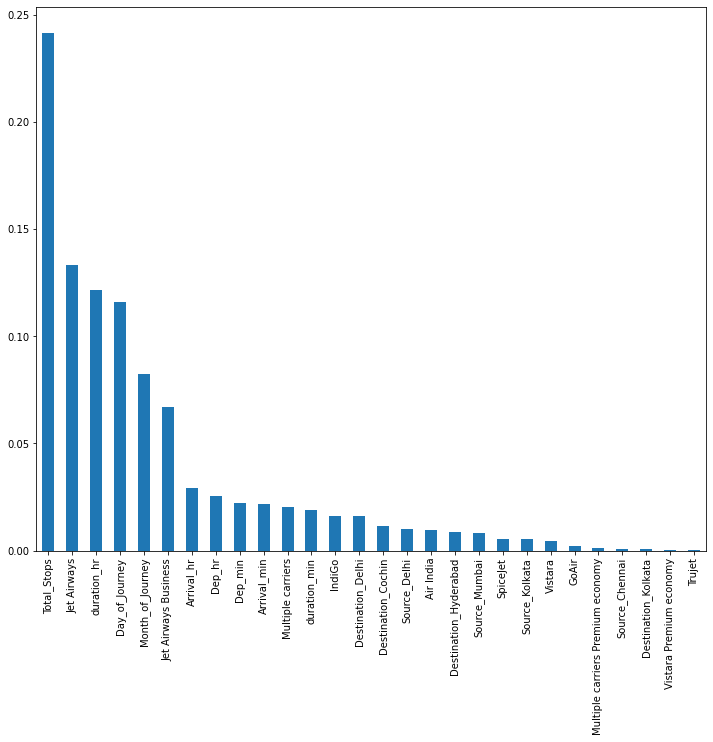

In [54]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,10))

In [55]:
## Splitting the dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [56]:
## Preparing the Extra Tree Regression 

ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(X_train,y_train)
y_predict=ET_model.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7526541921108618

The prediction score by ExtraTreesRegression is **75.39%**.

In [58]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train,y_train)
RFR_predict= RFR_model.predict(X_test)
r2_score(y_test, RFR_predict)

0.7912484460052983

The prediction score by RandomForestRegressor is **79.86%**.

**Hyperparamter**

In [59]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)] ## return 10 numbers
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6 ,45, num =5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

## Create random grid

rand_grid = { 'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf
}

rf = RandomForestRegressor()
rcv = RandomizedSearchCV(estimator=rf, param_distributions=rand_grid,scoring='neg_mean_squared_error', n_iter=10, cv=3, random_state=42, n_jobs=1)


In [ ]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rf_preds = rcv.predict(X_test)
rf_preds

array([10899.18953325, 13011.39991436, 11818.49570562, ...,
        6602.14165112,  8119.62699749,  3648.92172911])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE', mean_absolute_error(y_test,rf_preds))
print('MSE', mean_squared_error(y_test,rf_preds))

MAE 1148.748720809554
MSE 4018806.8687456944


In [ ]:
r2_score(y_test, rf_preds)

0.8140281217978639

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 71 kB/s 


In [ ]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train, y_train)

Learning rate set to 0.057463
0:	learn: 4434.8621834	total: 48.2ms	remaining: 48.2s
1:	learn: 4282.2163475	total: 50ms	remaining: 25s
2:	learn: 4131.9611854	total: 52.4ms	remaining: 17.4s
3:	learn: 3994.0630384	total: 54.4ms	remaining: 13.5s
4:	learn: 3872.2358893	total: 56.3ms	remaining: 11.2s
5:	learn: 3750.0741642	total: 58.3ms	remaining: 9.66s
6:	learn: 3637.9094907	total: 60.4ms	remaining: 8.57s
7:	learn: 3545.1189097	total: 62.4ms	remaining: 7.74s
8:	learn: 3455.9554853	total: 64.5ms	remaining: 7.1s
9:	learn: 3369.4044209	total: 66.6ms	remaining: 6.6s
10:	learn: 3290.3036315	total: 68.7ms	remaining: 6.18s
11:	learn: 3215.3606579	total: 70.8ms	remaining: 5.83s
12:	learn: 3147.3625563	total: 72.9ms	remaining: 5.54s
13:	learn: 3083.9532734	total: 75ms	remaining: 5.28s
14:	learn: 3022.0135800	total: 77.1ms	remaining: 5.06s
15:	learn: 2971.5123013	total: 79.2ms	remaining: 4.87s
16:	learn: 2920.7883783	total: 81.3ms	remaining: 4.7s
17:	learn: 2877.1872565	total: 83.4ms	remaining: 4.55s

In [ ]:
cat_preds = cat.predict(X_test)
cat_preds

array([10560.87546399, 12376.9804246 , 11888.25371179, ...,
        6858.80807819,  7369.54184259,  3609.04037617])

In [ ]:
r2_score(y_test, cat_preds)

0.8205245995270881

**By using the Catboost Regressor the predication score is 82.05%**

In [ ]:
!pip install lightgbm


In [ ]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [ ]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [ ]:
lgb_preds=lgb_model.predict(X_test)
r2_score(y_test, lgb_preds)

0.7784620995021239

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

[00:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7293454639704526

In [ ]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
## use the pickle to save our model

import pickle
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [ ]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr',
       'duration_min'],
      dtype='object')

In [ ]:
deploy_data = data.drop(['Route','Additional_Info'], axis=1)
deploy_data.to_csv('deploy_data')

In [ ]:
data_df = pd.read_csv('/content/deploy_data')

In [ ]:
data_df.columns

Index(['Unnamed: 0', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [ ]:
data_df.dtypes

Unnamed: 0                            int64
Air India                             int64
GoAir                                 int64
IndiGo                                int64
Jet Airways                           int64
Jet Airways Business                  int64
Multiple carriers                     int64
Multiple carriers Premium economy     int64
SpiceJet                              int64
Trujet                                int64
Vistara                               int64
Vistara Premium economy               int64
Source_Chennai                        int64
Source_Delhi                          int64
Source_Kolkata                        int64
Source_Mumbai                         int64
Destination_Cochin                    int64
Destination_Delhi                     int64
Destination_Hyderabad                 int64
Destination_Kolkata                   int64
Airline                              object
Source                               object
Destination                     

In [ ]:
x = data_df.drop('Price', axis=1)
y = data_df['Price']

In [ ]:
print(x.head())

   Unnamed: 0  Air India  GoAir  ...  Arrival_min  duration_hr  duration_min
0           0          0      0  ...           10            2            50
1           1          1      0  ...           15            7            25
2           2          0      0  ...           25           19             0
3           3          0      0  ...           30            5            25
4           4          0      0  ...           35            4            45

[5 rows x 32 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50 )


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat=CatBoostRegressor()
cat.fit(x_train,y_train)

CatBoostError: ignored

In [ ]:
data_df['Airline'].value_counts()